In [20]:
import pandas as pd
df = pd.read_csv(r'C:\Users\kumar\Downloads\netflix_titles_cleaned.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,Not Available,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
pd.isnull(df).sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8797 entries, 0 to 8796
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8797 non-null   object
 1   type          8797 non-null   object
 2   title         8797 non-null   object
 3   director      8797 non-null   object
 4   cast          8797 non-null   object
 5   country       8797 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8797 non-null   int64 
 8   rating        8797 non-null   object
 9   duration      8797 non-null   object
 10  listed_in     8797 non-null   object
 11  description   8797 non-null   object
dtypes: int64(1), object(11)
memory usage: 824.8+ KB


In [6]:
print(df['type'].value_counts())

Movie      6131
TV Show    2666
Name: type, dtype: int64


In [9]:
print(df['director'].value_counts())

unknown                           2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4529, dtype: int64


In [10]:
print(df['rating'].value_counts())

TV-MA       3209
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [14]:
print(df['country'].value_counts().head(40))

United States                    3642
India                             972
United Kingdom                    418
Japan                             244
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          86
Taiwan                             81
Indonesia                          79
Brazil                             77
Philippines                        75
United Kingdom, United States      75
United States, Canada              73
Germany                            67
China                              66
Thailand                           61
Argentina                          56
Hong Kong                          53
United States, United Kingdom      47
Italy                              45
Canada, Unit

In [15]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Number of content added per year
print(df['year_added'].value_counts().sort_index())


2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64


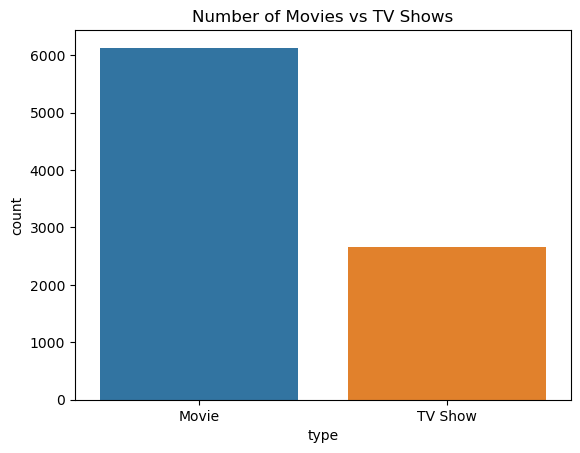

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title("Number of Movies vs TV Shows")
plt.show()


In [28]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Create new columns: year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


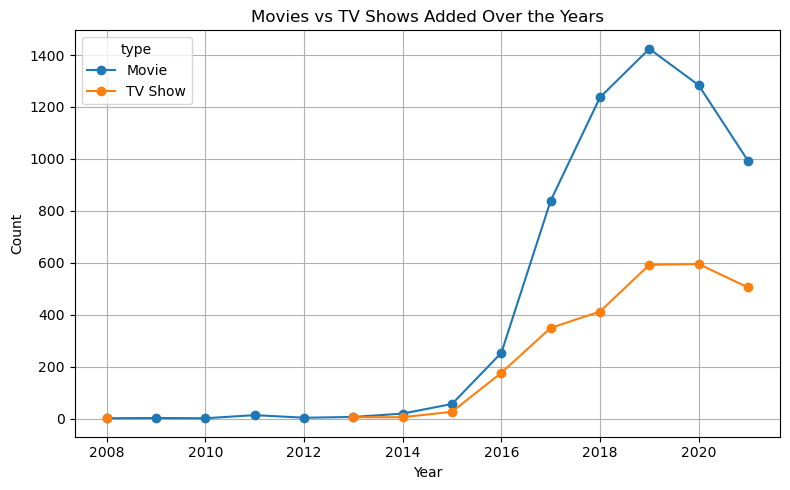

In [29]:
# : Line Plot – Movies vs TV Shows Added Each Year#
# Group by year and type
import matplotlib.pyplot as plt
type_year = df.groupby(['year_added', 'type']).size().unstack()

# Plot line chart
type_year.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Movies vs TV Shows Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


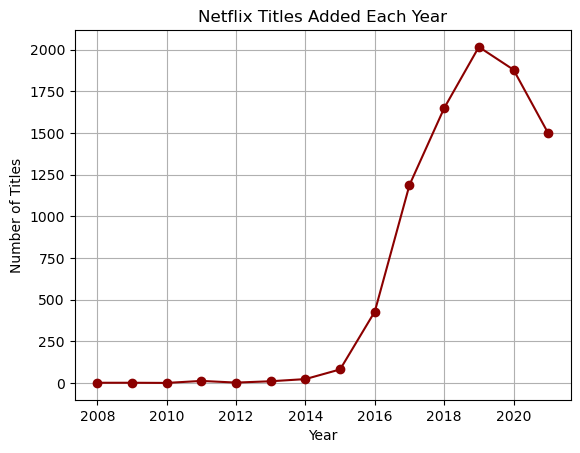

In [31]:
yearly_counts = df['year_added'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='darkred')
plt.title("Netflix Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()



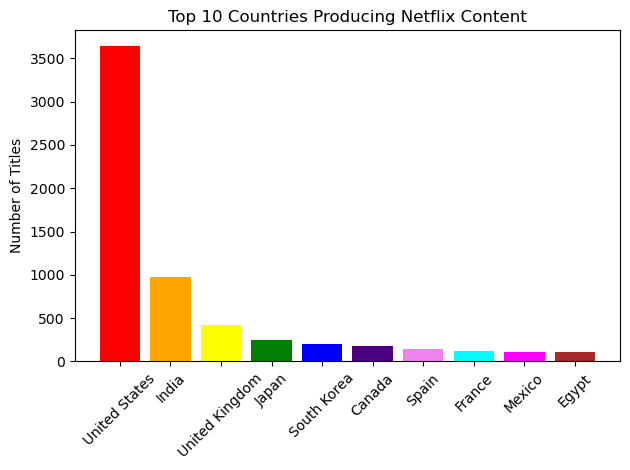

In [33]:
top_countries = df['country'].value_counts().head(10)

colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'cyan', 'magenta', 'brown']

plt.bar(top_countries.index, top_countries.values, color=colors)
plt.title("Top 10 Countries Producing Netflix Content")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()



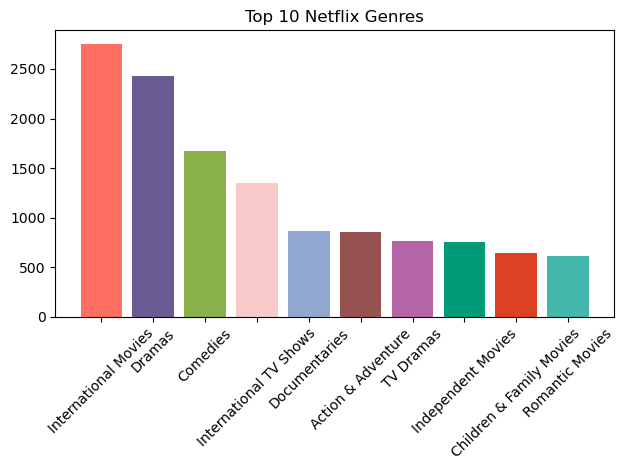

In [34]:
from collections import Counter

genres = df['listed_in'].str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]

genre_counts = Counter(flat_genres)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', 
          '#955251', '#B565A7', '#009B77', '#DD4124', '#45B8AC']

# Plotting
plt.bar(top_genres.keys(), top_genres.values(), color=colors)
plt.title("Top 10 Netflix Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


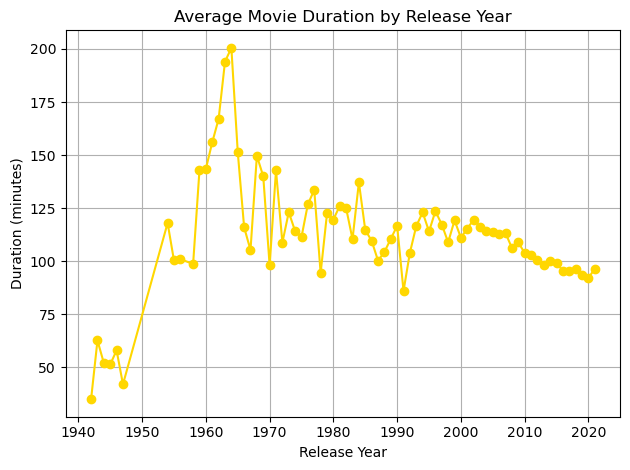

In [35]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_minutes'] = movies_df['duration'].str.extract('(\d+)').astype(float)

avg_duration = movies_df.groupby('release_year')['duration_minutes'].mean()

plt.plot(avg_duration.index, avg_duration.values, marker='o',color='gold')
plt.title("Average Movie Duration by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.grid()
plt.tight_layout()
plt.show()
